In [8]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [9]:



iris = load_iris()

X = iris.data
y = iris.target

iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['target'] = y

print(iris_df.head())
print("\nData description:")
print(iris_df.describe())

print("\nMissing values:\n", iris_df.isnull().sum())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Data description:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000  

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

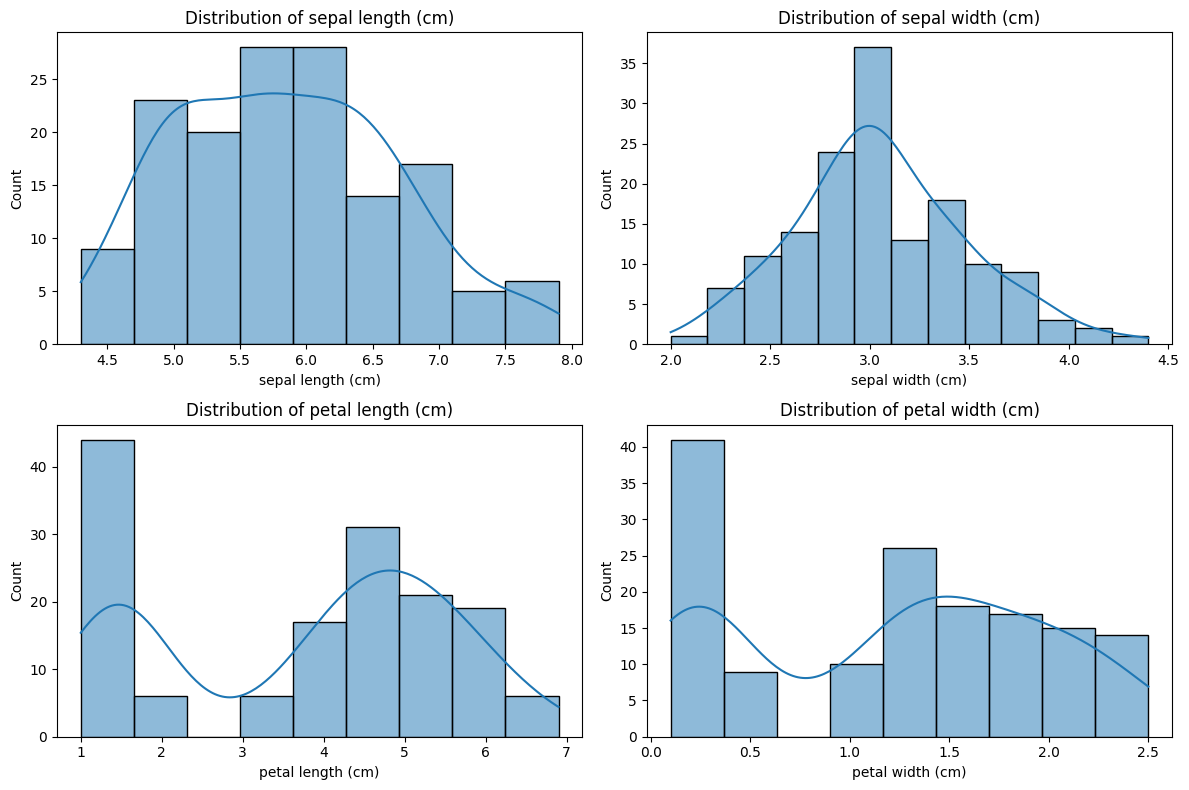

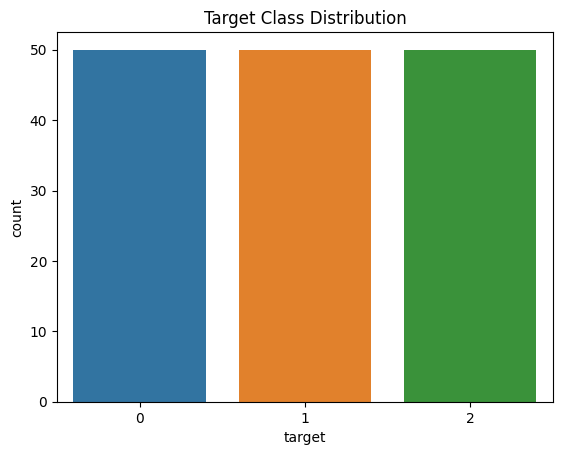

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

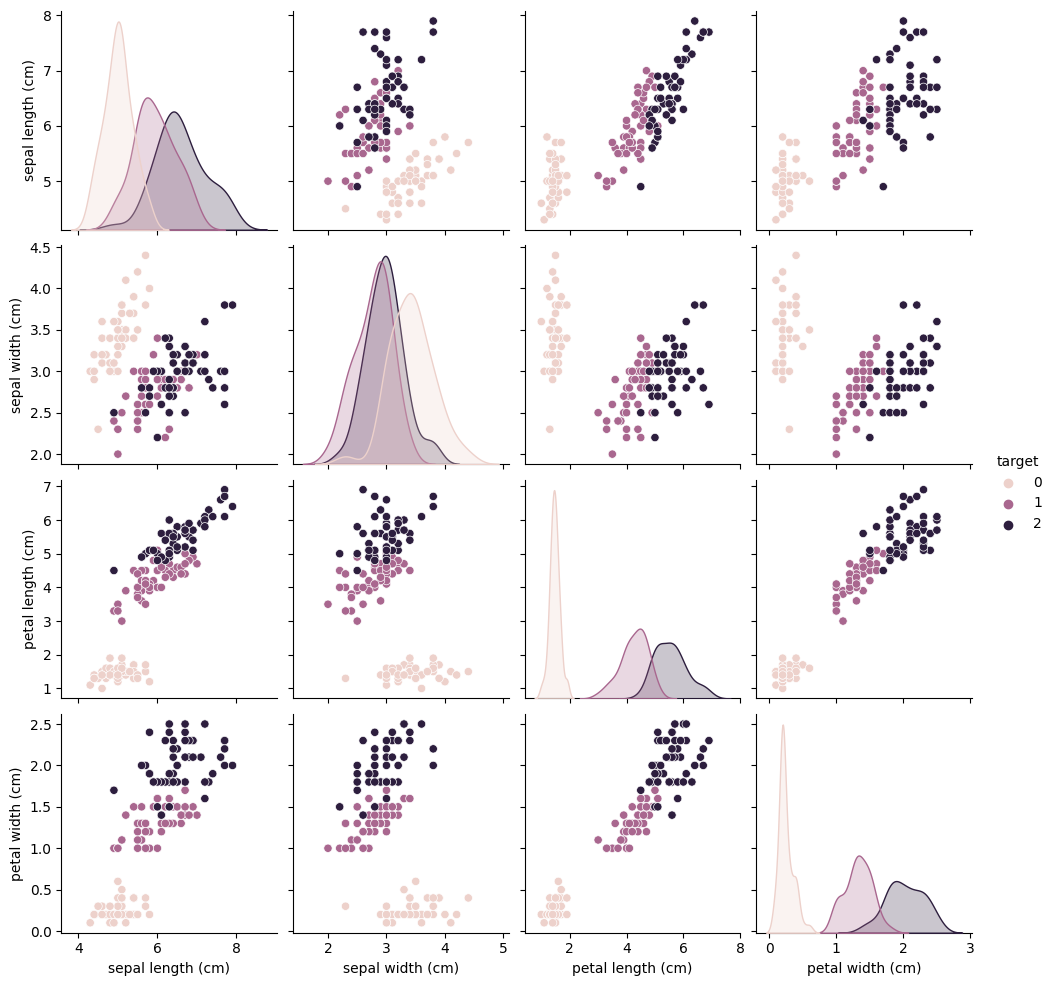

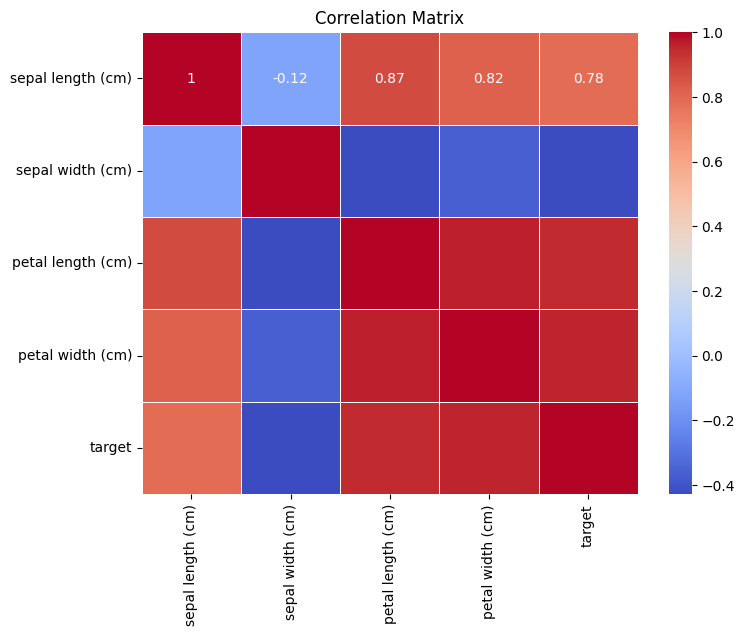

In [10]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.histplot(iris_df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

sns.countplot(x=iris_df['target'])
plt.title('Target Class Distribution')
plt.show()

sns.pairplot(iris_df, hue='target')
plt.show()

corr_matrix = iris_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [11]:

iris = load_iris()
X = iris.data  
y = iris.target.reshape(-1, 1) 

encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y)

In [12]:

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.3, random_state=42)


In [13]:
input_size = X_train.shape[1]  
hidden_size = 10  
output_size = y_train.shape[1]  

W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

lr = 0.01

In [14]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return z * (1 - z)

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [15]:
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [16]:

def backward_propagation(X, y, Z1, A1, A2, W1, W2, b1, b2):
    dZ2 = A2 - y
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

    return W1, b1, W2, b2

In [17]:
epochs = 1000
losses = [] 

for epoch in range(epochs):
    Z1, A1, Z2, A2 = forward_propagation(X_train, W1, b1, W2, b2)

    loss = -np.mean(np.sum(y_train * np.log(A2), axis=1))
    losses.append(loss) 

    W1, b1, W2, b2 = backward_propagation(X_train, y_train, Z1, A1, A2, W1, W2, b1, b2)

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')


Epoch 0, Loss: 1.9872074068478147
Epoch 100, Loss: 0.6691155648139957
Epoch 200, Loss: 0.6826908488983802
Epoch 300, Loss: 0.5627671015378439
Epoch 400, Loss: 0.31677555923318085
Epoch 500, Loss: 0.13093733330464996
Epoch 600, Loss: 0.11411878031245934
Epoch 700, Loss: 0.10189844906678844
Epoch 800, Loss: 0.09216101100456965
Epoch 900, Loss: 0.08582157005376817


In [18]:

_, _, _, A2_test = forward_propagation(X_test, W1, b1, W2, b2)
predictions = np.argmax(A2_test, axis=1)
y_true = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true, predictions)
print(f'Accuracy on test set: {accuracy * 100:.2f}%')


Accuracy on test set: 93.33%


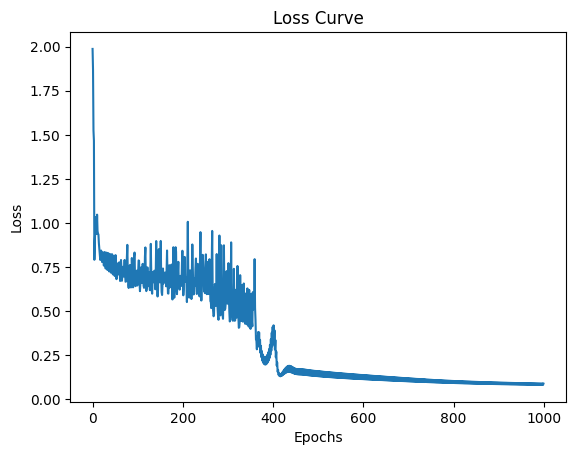

In [19]:

plt.plot(losses)
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()